# Домашнее задание 3. Анализ данных

Задание выполнил(а):

    Миронов Павел Владимирович

# Часть I

Каждое задание в этой части оценивается в 0,15 баллов. Всего за выполнение этой части можно получить 2,55 балла.

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import re

In [2]:
DIABETS = 'https://raw.githubusercontent.com/evgpat/datasets/main/pima_indians_diabetes.csv'
BABIES = 'https://raw.githubusercontent.com/evgpat/datasets/main/babies_all.txt'

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [3]:
try:
    data = pd.read_csv(DIABETS)
except:
    data = pd.read_csv("./pima_indians_diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

## Задание 1

Как вы видите, в данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов.

Для тех переменных, в которых есть пропуски, выведите количество пропущенных значений в следующем формате:

**"В переменной {название переменной} {количество} пропущенных значений"**

In [4]:
for column in data.columns:
    k = data[column].isna().sum()
    if k > 0:
        print(f"В переменной {column} {k} пропущенных значений")

В переменной Glucose 5 пропущенных значений
В переменной BloodPressure 35 пропущенных значений
В переменной SkinThickness 227 пропущенных значений
В переменной Insulin 374 пропущенных значений
В переменной BMI 11 пропущенных значений


## Задание 2

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [5]:
# Дискретные признаки
for column in "Glucose BloodPressure SkinThickness Insulin".split():
    # data[column].fillna(data[column].median(), inplace=True)
    data.fillna({column: data[column].median()}, inplace=True)

# Непрерывный признак
# data["BMI"].fillna(data["BMI"].mean(), inplace=True)
data.fillna({"BMI": data[column].median()}, inplace=True)

## Задание 3

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,33.782943,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,12.974268,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.825000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,125.000000,2.420000,81.000000,1.000000


## Задание 4

У скольких женщин строго старше 50 лет обнаружен диабет?

In [7]:
int(((data['Age'] > 50) & (data['Class'] == 1)).sum())

38

## Задание 5

Найдите трех женщин с наибольшими числом беременностей.

In [8]:
data.sort_values(by='Pregnancies', ascending=False).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
455,14,175.0,62.0,30.0,125.0,33.6,0.212,38,1


## Задание 6

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [9]:
int(((data['Age'] >= 30) & (data['Age'] <= 40) & (data['Pregnancies'] >= 3)).sum())

142

## Задание 7

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [10]:
# способ, который первый пришёл в голову:
print(round(((data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)).sum() / len(data) * 100, 2))

# способ поприкольнее
print(round(((data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)).mean() * 100, 2))

18.88
18.88


## Задание 8

Считается, что BMI >= 30 - это признак ожирения.
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [11]:
int(((data['BMI'] >= 30) & (data['BloodPressure'] > 89)).sum())

45

## Задание 9

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет.

In [12]:
# Glucose ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print("Средний уровень глюкозы у людей с диабетом:", float(data.loc[data['Class'] == 1, 'Glucose'].mean()))
print("Средний уровень глюкозы у людей без диабета:", float(data.loc[data['Class'] == 0, 'Glucose'].mean()))

Средний уровень глюкозы у людей с диабетом: 142.13059701492537
Средний уровень глюкозы у людей без диабета: 110.682


Сначала хотел удивиться таким значениям, а потом понял, что единицы измерения западные - в mg/dL. Тогда всё правдоподобно.

In [13]:
# BloodPressure ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print("Среднее давление у людей с диабетом:", float(data.loc[data['Class'] == 1, 'BloodPressure'].mean()))
print("Среднее давление у людей без диабета:", float(data.loc[data['Class'] == 0, 'BloodPressure'].mean()))

Среднее давление у людей с диабетом: 75.1231343283582
Среднее давление у людей без диабета: 70.92


In [14]:
# Insulin ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print("Средний уровень инсулина в крови у людей с диабетом:", float(data.loc[data['Class'] == 1, 'Insulin'].mean()))
print("Средний уровень инсулина в крови у людей без диабета:", float(data.loc[data['Class'] == 0, 'Insulin'].mean()))

Средний уровень инсулина в крови у людей с диабетом: 164.70149253731344
Средний уровень инсулина в крови у людей без диабета: 127.792


## Задание 10

Постройте гистограммы для любых двух количественных признаков.

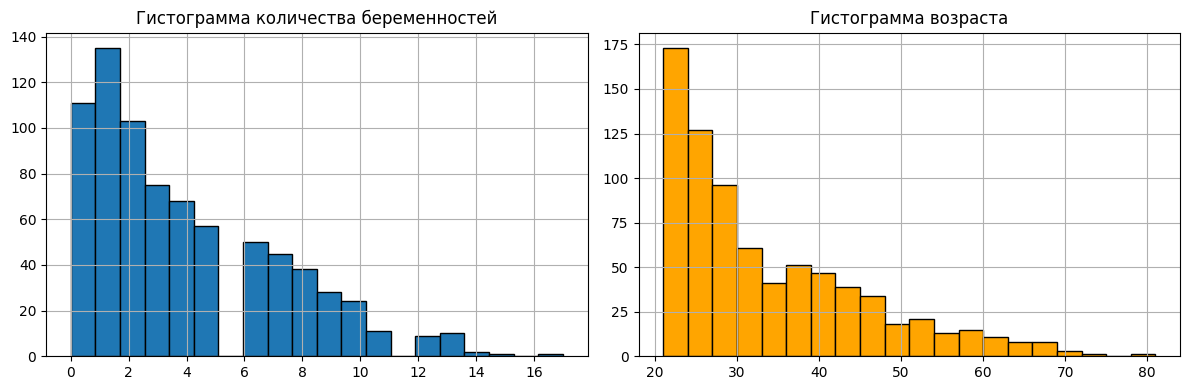

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

data['Pregnancies'].hist(ax=axes[0], bins=20, edgecolor='black')
axes[0].set_title('Гистограмма количества беременностей')
axes[0].set_xticks(range(int(data['Pregnancies'].min()), int(data['Pregnancies'].max()) + 1, 2))  # шаг 2

data['Age'].hist(ax=axes[1], bins=20, edgecolor='black', color='orange')
axes[1].set_title('Гистограмма возраста')

plt.tight_layout()
plt.show()

## Задание 11

Постройте круговую диаграмму для признака __Class__.

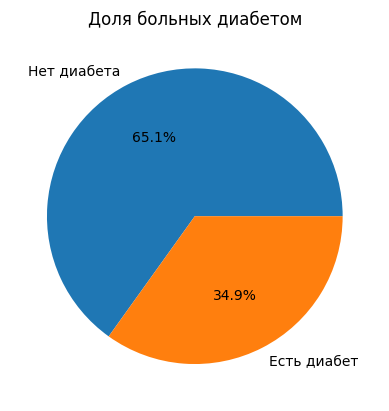

In [16]:
(data['Class'].value_counts()
 .rename(index={0: 'Нет диабета', 1: 'Есть диабет'})
 .plot.pie(autopct='%.1f%%'))

plt.title('Доля больных диабетом')
plt.ylabel('')
plt.show()

## Задание 12

Постройте распределение для признака __BMI__ и сравните его с нормальным (напишите вывод в новой markdown-ячейке под графиками)

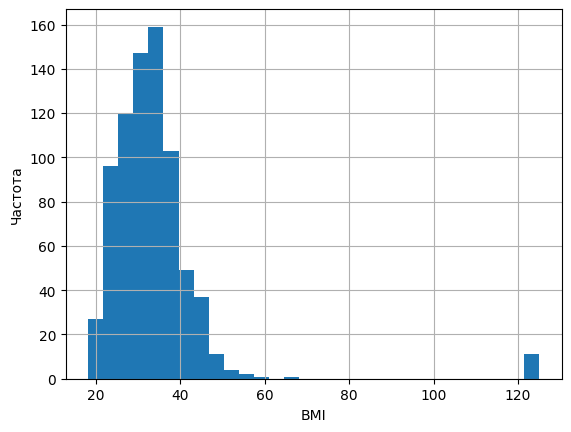

In [17]:
data['BMI'].hist(bins=30)
plt.xlabel('BMI')
plt.ylabel('Частота')
plt.show()

Распределение признака BMI смещено влево по сравнению с нормальным распределением. Возможно, в правой части распределения есть выбросы.

Постройте нормальное распределение поверх графика.

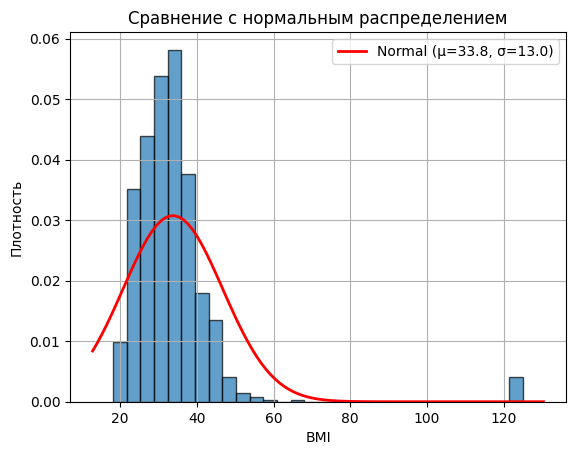

In [18]:
import numpy as np
import scipy.stats as stats

# Гистограмма
data['BMI'].hist(bins=30, density=True, alpha=0.7, edgecolor='black')

# Нормальная кривая
mu, std = data['BMI'].mean(), data['BMI'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r-', linewidth=2, label=f'Normal (μ={mu:.1f}, σ={std:.1f})')

plt.xlabel('BMI')
plt.ylabel('Плотность')
plt.title('Сравнение с нормальным распределением')
plt.legend()
plt.show()

## Задание 13

Постройте следующий график: процент больных диабетом в зависимости от числа беременностей.

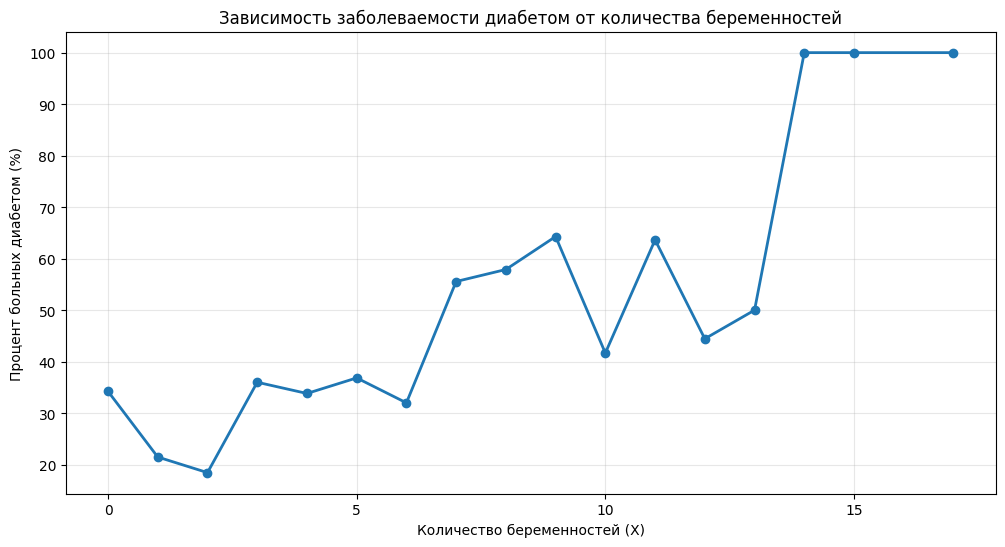

<Figure size 1000x600 with 0 Axes>

In [19]:
table = data.groupby('Pregnancies')['Class'].agg([
    ('Количество_больных', 'sum'),
    ('Общее_количество', 'count'),
    ('Процент_больных_%', lambda x: round(x.mean() * 100, 2))
]).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(table['Pregnancies'], table['Процент_больных_%'], 
         marker='o', linestyle='-', linewidth=2)

plt.xlabel('Количество беременностей (X)')
plt.ylabel('Процент больных диабетом (%)')
plt.title('Зависимость заболеваемости диабетом от количества беременностей')
plt.grid(alpha=0.3)
plt.xticks(range(int(table['Pregnancies'].min()), int(table['Pregnancies'].max()) + 1, 5))
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

## Задание 14

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [20]:
data['wasPregnant'] = (data['Pregnancies'] > 0).astype(int)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,1
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0


## Задание 15

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [21]:
print("Процент больных диабетом среди женщин, которые были беременны:", round(((data['Class'] == 1) & (data['wasPregnant'] == 1)).mean() * 100, 2))
print("Процент больных диабетом среди женщин, которые не были беременны:", round(((data['Class'] == 1) & (data['wasPregnant'] == 0)).mean() * 100, 2))

Процент больных диабетом среди женщин, которые были беременны: 29.95
Процент больных диабетом среди женщин, которые не были беременны: 4.95


## Задание 16

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__
    
Underweight = <18.5

Normal weight = 18.5–24.9

Overweight = 25–29.9

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [22]:
data['bodyType'] = pd.cut(data['BMI'], 
                          bins=[-np.inf, 18.5, 25, 30, np.inf], 
                          labels="Underweight, Normal weight, Overweight, Obesity".split(", "), 
                          include_lowest=True)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,1,Overweight
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1,Normal weight
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,Obesity


## Задание 17

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [23]:
condition = (data['bodyType'] == 'Normal weight') & (data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)
print('Процент "здоровых" женщин, больных диабетом:', (data.loc[condition, 'Class'] == 1).mean() * 100)

Процент "здоровых" женщин, больных диабетом: 10.0


# Часть II

Каждое задание в этой части оценивается в 1,15 баллов. Всего за выполнение этой части можно получить 3,45 балла.

In [24]:
try:
    babies = pd.read_csv(BABIES, index_col=0)
except:
    babies = pd.read_csv("./babies_all.txt", index_col=0)
babies.head(10)

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## Задание 1

Исследуйте набор данных `babies`. Ответьте на вопросы.

1. Какие годы включает датасет

2. Какое имя в датасете находится по индексом 121?

3. Cколько всего родилось детей по имени 'Aaron' за все время?

4. Насколько больше за все время родилось мальчиков чем девочек?

5. Cколько мальчиков родилось в 2010?

6. Сколько в датасете девочек по имени John?

In [25]:
print(f"1. Какие годы включает датасет? {babies['year'].min()}-{babies['year'].max()}")
print(f"2. Какое имя в датасете находится под индексом 121? {babies['name'].iloc[121]}")
print(f"3. Cколько всего родилось детей по имени 'Aaron' за все время? {babies.loc[babies['name'] == 'Aaron', 'number'].sum()}")

diff = (babies.loc[babies['sex'] == 'M', 'number']).sum() - (babies.loc[babies['sex'] == 'F', 'number']).sum()
print(f"4. Насколько больше за все время родилось мальчиков чем девочек? {diff}")

total = (babies.loc[(babies['year'] == 2010) & (babies['sex'] == 'M'), 'number']).sum()
print(f"5. Cколько мальчиков родилось в 2010? {total}")

johns = (babies.loc[(babies['name'] == 'John') & (babies['sex'] == 'F'), 'number']).sum()
print(f"6. Сколько в датасете девочек по имени John? {johns}")

1. Какие годы включает датасет? 1880-2010
2. Какое имя в датасете находится под индексом 121? Ann
3. Cколько всего родилось детей по имени 'Aaron' за все время? 527668
4. Насколько больше за все время родилось мальчиков чем девочек? 2422447
5. Cколько мальчиков родилось в 2010? 1898382
6. Сколько в датасете девочек по имени John? 21578


## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: baby_girls и baby_boys.

In [26]:
# Не совсем очевидно из условия, как именно необходимо совершить группировку. 
# Я решил, что имена девочек/мальчиков нас не интересуют, 
# а интересует именно статистика рождаемости по годам
baby_girls = babies[babies['sex'] == 'F'].groupby('year')['number'].sum().reset_index()
baby_boys = babies[babies['sex'] == 'M'].groupby('year')['number'].sum().reset_index()

In [27]:
baby_girls.head(5)

,year,number
0,1880,90993
1,1881,91955
2,1882,107851
3,1883,112322
4,1884,129021


In [28]:
baby_boys.head(5)

,year,number
0,1880,110493
1,1881,100748
2,1882,113687
3,1883,104632
4,1884,114445


2. Создайте фигуру matplotlib с 3 графиками один под другим.

3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y.

4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.

5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут `.index`

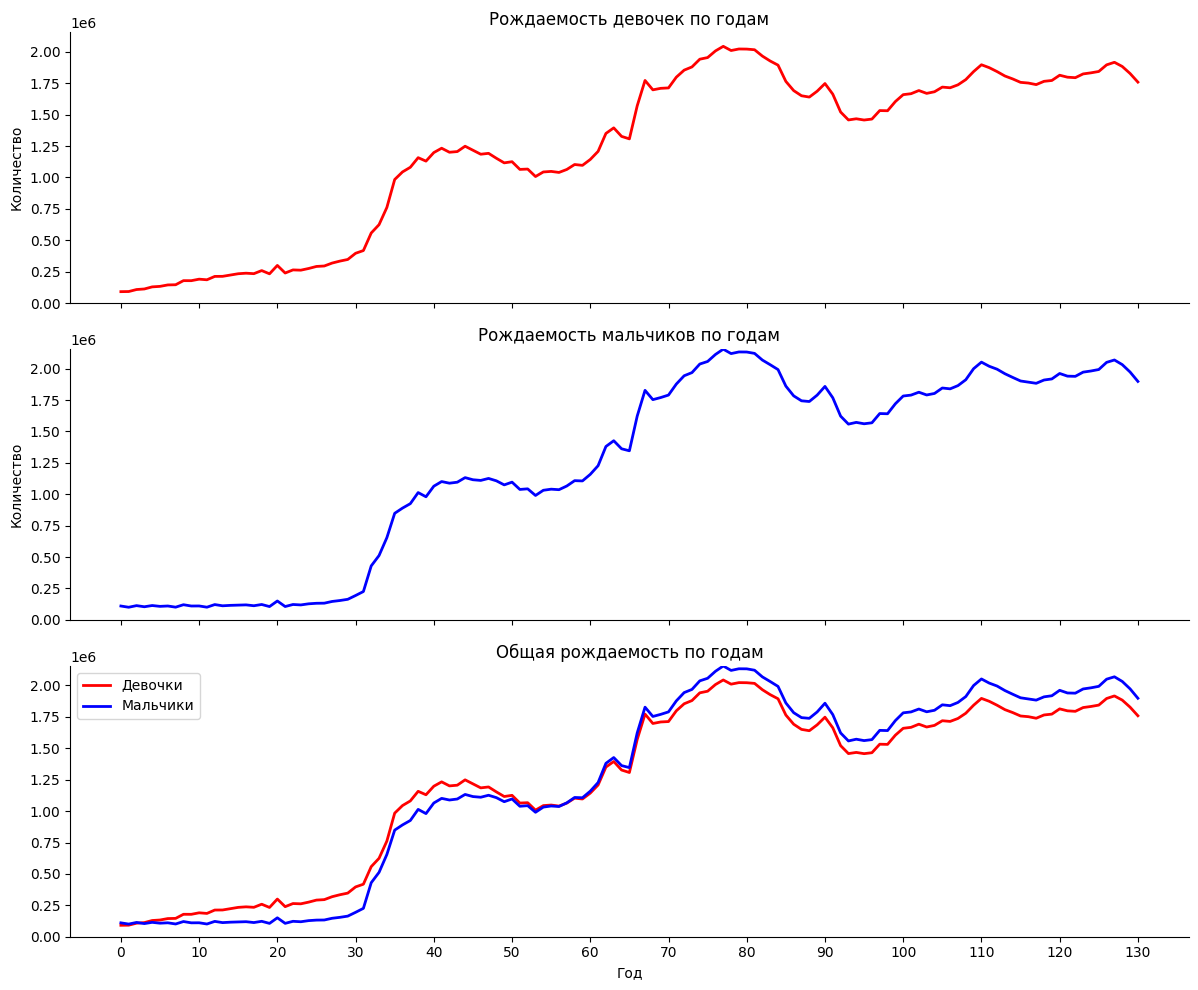

In [29]:
y_max = max(baby_girls['number'].max(), baby_boys['number'].max())

fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# 1. Девочки
axes[0].plot(baby_girls.index, baby_girls['number'], color='red', linewidth=2)
axes[0].set_title('Рождаемость девочек по годам')
axes[0].set_ylim(0, y_max)

# 2. Мальчики
axes[1].plot(baby_boys.index, baby_boys['number'], color='blue', linewidth=2)
axes[1].set_title('Рождаемость мальчиков по годам')
axes[1].set_ylim(0, y_max)

# 3. Общий график
axes[2].plot(baby_girls.index, baby_girls['number'], color='red', linewidth=2, label='Девочки')
axes[2].plot(baby_boys.index, baby_boys['number'], color='blue', linewidth=2, label='Мальчики')
axes[2].set_title('Общая рождаемость по годам')
axes[2].set_xlabel('Год')

axes[2].set_ylim(0, y_max)
axes[2].legend()
axes[2].set_xticks(baby_girls.index[::10])  # подписи годов каждые 10 лет

for i in range(2):
    axes[i].set_ylabel('Количество')
# Убираем верхние и правые границы
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Я бы сказал, что корреляция между графиками рождаемости мальчиков и девочек очень высока. Графики очень похожи, все колебания вверх-вниз совпадают во всех случаях.  
Интересно, что рождаемость девочек была выше до 60-х годов 20-го века, а затем, после примерно 20-летнего периода, рождаемость мальчиков стала выше.

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).

In [30]:
names = babies.groupby(['name', 'sex'])['number'].sum().reset_index().sort_values('number', ascending=False)
names.head(5)

,name,sex,number
38999,James,M,5049727
43381,John,M,5040319
75712,Robert,M,4767995
63724,Michael,M,4243903
61634,Mary,F,4103935


In [31]:
girls = names[names['sex'] == 'F'].sort_values('number', ascending=False).reset_index()
girls.head(2)

,index,name,sex,number
0,61634,Mary,F,4103935
1,71051,Patricia,F,1568742


In [32]:
boys = names[names['sex'] == 'M'].sort_values('number', ascending=False).reset_index()
boys.head(2)

,index,name,sex,number
0,38999,James,M,5049727
1,43381,John,M,5040319


2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.

3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.

4. Постройте 4 линейных графика - тренд для каждого имени за все время.

5. Каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.

6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

7. Опишите тренды в ячейке markdown под графиками.

In [33]:
top_names = []
for i in range(2):
    top_names.append((girls.iloc[i]['name'], girls.iloc[i]['sex']))
    top_names.append((boys.iloc[i]['name'], boys.iloc[i]['sex']))
top_names.sort(key=lambda x: x[1])
top_names

[('Mary', 'F'), ('Patricia', 'F'), ('James', 'M'), ('John', 'M')]

In [34]:
babies_alisa = babies[babies[['name', 'sex']].apply(tuple, axis=1).isin(top_names)].reset_index()
babies_alisa.head(5)

,index,name,sex,number,year
0,0,Mary,F,7065,1880
1,942,John,M,9655,1880
2,944,James,M,5927,1880
3,0,Mary,F,6919,1881
4,938,John,M,8769,1881


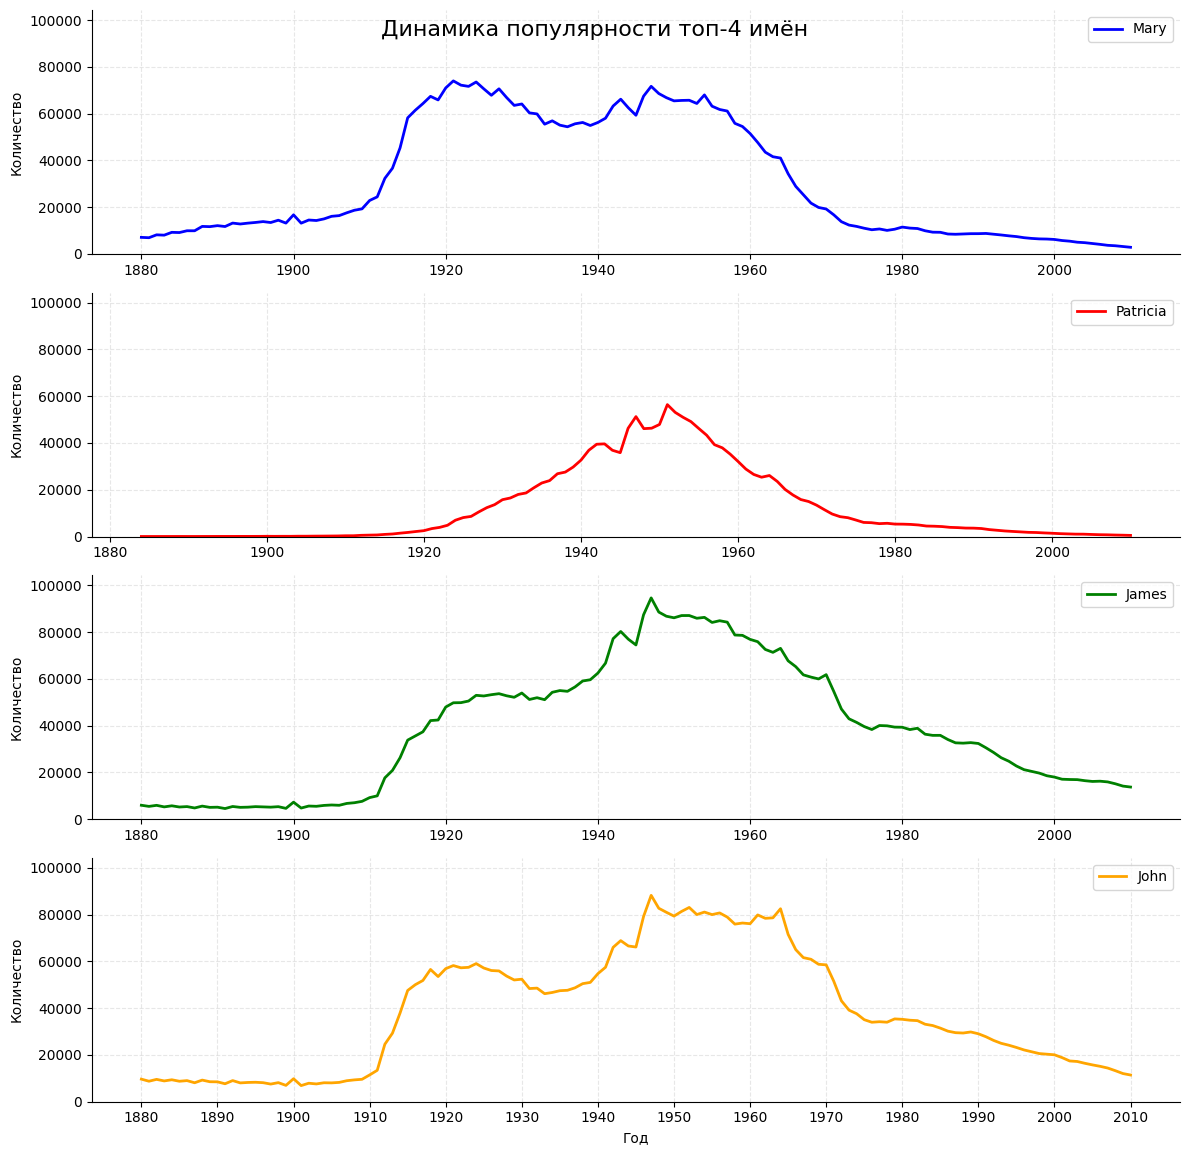

In [37]:
names = list(map(lambda x: x[0], top_names))

fig, axes = plt.subplots(4, 1, figsize=(12, 12))

y_max = 0
for name in names:
    name_data = babies_alisa[babies_alisa['name'] == name]
    y_max = max(y_max, name_data['number'].max()) * 1.05

colors = ['blue', 'red', 'green', 'orange']

# Построение графиков для каждого имени
for i, (name, color) in enumerate(zip(names, colors)):
    name_data = babies_alisa[babies_alisa['name'] == name].sort_values('year')
    axes[i].plot(name_data['year'], name_data['number'], 
                 color=color, linewidth=2, label=name)
    
    axes[i].set_ylabel('Количество')
    axes[i].set_ylim(0, y_max)
    axes[i].legend(loc='upper right')
    axes[i].grid(alpha=0.3, linestyle='--')
    
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

axes[-1].set_xlabel('Год')
fig.suptitle('Динамика популярности топ-4 имён', fontsize=16, y=0.95)
all_years = sorted(babies_alisa['year'].unique())
if len(all_years) > 20:
    axes[-1].set_xticks(all_years[::10])
else:
    axes[-1].set_xticks(all_years)

plt.tight_layout()
plt.show()

Все 4 имени были не очень распространены в конце 19-го века, основной всплекс популярности пришёлся на 1910-1920-е годы, и в середине 20-го века эти имена переживали пик популярности. К концу века популярность этих имён начала спадать. Особенно сильно это заметно на имени Patricia, которое к 21-му веку практически исчезло из употребления.

## Часть III

Каждое задание в этой части оценивается в 0,2 балла. Всего за выполнение этой части можно получить 4 балла.

Вам предлагается проанализировать датасет с Data - вакансиями.  
Скачайте его https://disk.yandex.ru/d/QUa3pCKVk48cAQ и считайте с помощью `pd.read_csv`.




In [38]:
df = pd.read_csv("./vacancies.csv")

1. Выведите первые 5 и последние 5 строк датасета. Примените к датасету методы `info` и `describe`. Сколько в датасете строк и столбцов?

In [39]:
df.head(5)

,Unnamed: 0,position_name,employer_name,area,experience,schedule,employment,professional_roles,salary,description,key_skills
0,0,Data Scientist Авито,Changellenge,Москва,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 255000, 'to': 490000, 'currency': 'RU...",<p>В наших командах разрабатывают эффективные ...,[]
1,1,Data analyst,Публичная Компания «Freedom Finance Global PLC»,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,"BI-аналитик, аналитик данных","{'from': 800000, 'to': 'null', 'currency': 'KZ...",<p><strong>Обязанности</strong></p><ul><li>Изв...,[]
2,2,Data Engineer/Data Analyst,IMANTECH,Ташкент,Нет опыта,Гибкий график,Полная занятость,"BI-аналитик, аналитик данных",NaN,<p><strong>About Us:</strong> Welcome to <stro...,"['SQL', 'Визуализация данных', 'Python', 'Powe..."
3,3,Стажер в направление Big Data,T2,Москва,Нет опыта,Полный день,Полная занятость,"BI-аналитик, аналитик данных",NaN,<strong>Что нужно делать:</strong> <ul> <li>Со...,[]
4,4,Data Marketing Manager / Маркетолог по анализу...,Procter & Gamble,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 950000, 'to': 'null', 'currency': 'KZ...",<p><strong>Найм в ТОО «Проктер энд Гэмбл Казах...,"['Английский язык', 'Аналитический склад ума']"


In [40]:
df.tail(5)

,Unnamed: 0,position_name,employer_name,area,experience,schedule,employment,professional_roles,salary,description,key_skills
1522,1522,Senior Data Scientist в b2c направление,HeadHunter,Москва,От 3 до 6 лет,Гибкий график,Полная занятость,"Программист, разработчик",NaN,<p>Наша команда работает с соискательской функ...,"['Python', 'Machine Learning', 'SQL', 'PyTorch..."
1523,1523,Data analyst (Senior),Иви,Москва,От 3 до 6 лет,Полный день,Полная занятость,"BI-аналитик, аналитик данных",NaN,<p><strong>Иви — один из лидеров рынка онлайн-...,[]
1524,1524,Senior Data Analyst,Autodoc Group (Автодок Казахстан),Алматы,От 3 до 6 лет,Полный день,Полная занятость,Продуктовый аналитик,NaN,<p>Company Description</p> <p>AUTODOC is a tec...,[]
1525,1525,TeamLead Data Engineer,HeadHunter,Москва,От 3 до 6 лет,Полный день,Полная занятость,"Программист, разработчик",NaN,"<p><strong>Привет,</strong> <strong>на связи к...","['Python', 'Apache Airflow', 'Apache Cassandra..."
1526,1526,Senior Python Developer (Data Platform),Mindbox,Москва,От 3 до 6 лет,Гибкий график,Полная занятость,"Программист, разработчик",NaN,<p><strong>Mindbox</strong> — крупнейшая в Рос...,"['Python', 'PySpark', 'Airflow', 'Kafka', 'Del..."


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1527 non-null   int64 
 1   position_name       1527 non-null   object
 2   employer_name       1527 non-null   object
 3   area                1527 non-null   object
 4   experience          1527 non-null   object
 5   schedule            1527 non-null   object
 6   employment          1527 non-null   object
 7   professional_roles  1527 non-null   object
 8   salary              220 non-null    object
 9   description         1527 non-null   object
 10  key_skills          1527 non-null   object
dtypes: int64(1), object(10)
memory usage: 131.4+ KB


In [42]:
df.describe()

,Unnamed: 0
count,1527.000000
mean,763.000000
std,440.951244
min,0.000000
25%,381.500000
50%,763.000000
75%,1144.500000
max,1526.000000


В датасете 1527 строк и 10 столбцов (11-й - индекс).

2. Есть ли в датасете пропуски?

In [43]:
df.isna().sum()

Unnamed: 0               0
position_name            0
employer_name            0
area                     0
experience               0
schedule                 0
employment               0
professional_roles       0
salary                1307
description              0
key_skills               0
dtype: int64

3. Есть в датасете полные дубли? Если да, удалите их (метод drop_duplicates).

In [44]:
print(f"Количество полных дублей: {df.duplicated().sum()}")

Количество полных дублей: 0


4. Сколько уникальных значений у переменной professional_roles?

In [45]:
print(f"Количество уникальных значений у professional_roles: {df['professional_roles'].nunique()}")

Количество уникальных значений у professional_roles: 36


5. Сколько в датасете вакансий, не требующих опыта?

In [46]:
print(f"Число вакансий, не требующих опыта: {(df['experience'] == 'Нет опыта').sum()}")

Число вакансий, не требующих опыта: 136


6. Какое среднее количество навыков в вакансии? (переменная key_skills)

In [47]:
print(f"Среднее количество навыков в вакансии: {round(df['key_skills'].str.split(',').str.len().mean(), 2)}")

Среднее количество навыков в вакансии: 4.28


7. Какие валюты (ключ currency в поле salary) используются для заработной платы? Создайте столбец currency.  
*Подсказка. Как вариант, можете воспользоваться функцией eval, которая исполняет код, написанный в строке. Для проверки на NaN можете использовать pd.isnull()*

In [48]:
df['currency'] = df['salary'].dropna().apply(lambda x: eval(x)['currency'])
df['currency'].value_counts()

currency
RUR    181
USD     18
KZT     14
EUR      4
UZS      2
BYR      1
Name: count, dtype: int64

8. Какая компания лидирует по количеству вакансий?

In [49]:
print(f"Лидер по количеству вакансий: {df['employer_name'].value_counts().head(1).index[0]}")

Лидер по количеству вакансий: СБЕР


9.  Какая компания лидирует по количеству вакансий с указанием заработной платы?

In [50]:
df_with_salary = df[df['salary'].notna()]
print(f"Лидер по количеству вакансий с указанием заработной платы: {df_with_salary['employer_name'].value_counts().head(1).index[0]}")

Лидер по количеству вакансий с указанием заработной платы: Aston


10. Создайте столбец salary_num. Рассчитайте его, используя столбец salary. Если в это столбце указана вилка зарплаты, используйте среднее значение между from и to. Если указано только одно из значений (from или to, используйте его) **(2)**

In [51]:
def calc_salary(line):
    line = eval(line)
    if 'from' in line and line['from'] != 'null' and 'to' in line and line['to'] != 'null':
        return (line['from'] + line['to']) / 2
    elif ('from' not in line or line['from'] == 'null') and 'to' in line:
        return line['to']
    elif 'from' in line and ('to' not in line or line['to'] == 'null'):
        return line['from']
    else:
        return NaN


df['salary_num'] = df['salary'].dropna().apply(calc_salary)
df.head(5)

,Unnamed: 0,position_name,employer_name,area,experience,schedule,employment,professional_roles,salary,description,key_skills,currency,salary_num
0,0,Data Scientist Авито,Changellenge,Москва,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 255000, 'to': 490000, 'currency': 'RU...",<p>В наших командах разрабатывают эффективные ...,[],RUR,372500.0
1,1,Data analyst,Публичная Компания «Freedom Finance Global PLC»,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,"BI-аналитик, аналитик данных","{'from': 800000, 'to': 'null', 'currency': 'KZ...",<p><strong>Обязанности</strong></p><ul><li>Изв...,[],KZT,800000.0
2,2,Data Engineer/Data Analyst,IMANTECH,Ташкент,Нет опыта,Гибкий график,Полная занятость,"BI-аналитик, аналитик данных",NaN,<p><strong>About Us:</strong> Welcome to <stro...,"['SQL', 'Визуализация данных', 'Python', 'Powe...",NaN,NaN
3,3,Стажер в направление Big Data,T2,Москва,Нет опыта,Полный день,Полная занятость,"BI-аналитик, аналитик данных",NaN,<strong>Что нужно делать:</strong> <ul> <li>Со...,[],NaN,NaN
4,4,Data Marketing Manager / Маркетолог по анализу...,Procter & Gamble,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 950000, 'to': 'null', 'currency': 'KZ...",<p><strong>Найм в ТОО «Проктер энд Гэмбл Казах...,"['Английский язык', 'Аналитический склад ума']",KZT,950000.0


11. Какая средняя заработная плата среди вакансий в рублях? А медианная заработная плата?  

In [53]:
rub_salaries = df[(df['currency'] == 'RUR') & (df['salary_num'].notna())]['salary_num']

print(f"Средняя зарплата в рублях: {round(rub_salaries.mean(), 2)} руб.")
print(f"Медианная зарплата в рублях: {round(rub_salaries.median(), 2)} руб.")

Средняя зарплата в рублях: 212395.03 руб.
Медианная зарплата в рублях: 200000.0 руб.


12. Создайте столбец is_python_requirement, который принимает значение 1, если в key_skills присутствует python (учитывайте написание в любом регистре, а также вхождения подстроки python.).  Какой процент вакансий требует знания python?

In [54]:
df['is_python_requirement'] = df['key_skills'].apply(lambda x: int('python' in str(x).lower()))
print(f"Процент вакансий, ртебующих знания python: {round(df['is_python_requirement'].mean() * 100, 2)}")

Процент вакансий, ртебующих знания python: 41.45


13. Сгруппируйте по столбцам experience, schedule, employment, is_python_requirement (сразу по четырем столбцам). Найдите по каждой группе:
- количество опубликованных вакансий
- количество компаний, которые опубликовали вакансии
- среднюю заработную плату среди вакансий с указанием зарплаты в рублях


In [55]:
grouped = df.groupby(['experience', 'schedule', 'employment', 'is_python_requirement'])
# df[['experience', 'schedule', 'employment', 'is_python_requirement']].drop_duplicates()
grouped.size()

experience          schedule          employment           is_python_requirement
Более 6 лет         Гибкий график     Полная занятость     0                          4
                                      Частичная занятость  0                          1
                    Полный день       Полная занятость     0                         49
                                                           1                         10
                    Удаленная работа  Полная занятость     0                         11
                                                           1                         12
Нет опыта           Гибкий график     Полная занятость     1                          2
                                      Стажировка           1                          3
                    Полный день       Полная занятость     0                         26
                                                           1                         55
                                      С

In [56]:
result = grouped.agg(
    total_vacancies=('Unnamed: 0', 'count'),  # или любой не-NaN столбец
    unique_companies=('employer_name', 'nunique'),
    avg_salary_rub=('salary_num', lambda s: s[(df.loc[s.index, 'currency'] == 'RUR')].mean())
).reset_index()
result.head(10)

,experience,schedule,employment,is_python_requirement,total_vacancies,unique_companies,avg_salary_rub
0,Более 6 лет,Гибкий график,Полная занятость,0,4,2,NaN
1,Более 6 лет,Гибкий график,Частичная занятость,0,1,1,NaN
2,Более 6 лет,Полный день,Полная занятость,0,49,30,318000.000000
3,Более 6 лет,Полный день,Полная занятость,1,10,9,NaN
4,Более 6 лет,Удаленная работа,Полная занятость,0,11,7,450000.000000
5,Более 6 лет,Удаленная работа,Полная занятость,1,12,10,310000.000000
6,Нет опыта,Гибкий график,Полная занятость,1,2,2,225000.000000
7,Нет опыта,Гибкий график,Стажировка,1,3,1,NaN
8,Нет опыта,Полный день,Полная занятость,0,26,17,67571.428571
9,Нет опыта,Полный день,Полная занятость,1,55,6,85714.285714


14. Создайте столбец count_skills. В нём должна быть длина списка, который находит в столбце key_skills. Обратите внимание, что изначально столбец key_skills - строка, например, '[]' Подумайте, как превратить её в список и посчитать его длину.  

In [57]:
df['count_skills'] = df['key_skills'].dropna().apply(lambda x: len(eval(x)))
df.head(5)

,Unnamed: 0,position_name,employer_name,area,experience,schedule,employment,professional_roles,salary,description,key_skills,currency,salary_num,is_python_requirement,count_skills
0,0,Data Scientist Авито,Changellenge,Москва,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 255000, 'to': 490000, 'currency': 'RU...",<p>В наших командах разрабатывают эффективные ...,[],RUR,372500.0,0,0
1,1,Data analyst,Публичная Компания «Freedom Finance Global PLC»,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,"BI-аналитик, аналитик данных","{'from': 800000, 'to': 'null', 'currency': 'KZ...",<p><strong>Обязанности</strong></p><ul><li>Изв...,[],KZT,800000.0,0,0
2,2,Data Engineer/Data Analyst,IMANTECH,Ташкент,Нет опыта,Гибкий график,Полная занятость,"BI-аналитик, аналитик данных",NaN,<p><strong>About Us:</strong> Welcome to <stro...,"['SQL', 'Визуализация данных', 'Python', 'Powe...",NaN,NaN,1,11
3,3,Стажер в направление Big Data,T2,Москва,Нет опыта,Полный день,Полная занятость,"BI-аналитик, аналитик данных",NaN,<strong>Что нужно делать:</strong> <ul> <li>Со...,[],NaN,NaN,0,0
4,4,Data Marketing Manager / Маркетолог по анализу...,Procter & Gamble,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 950000, 'to': 'null', 'currency': 'KZ...",<p><strong>Найм в ТОО «Проктер энд Гэмбл Казах...,"['Английский язык', 'Аналитический склад ума']",KZT,950000.0,0,2


15. Создайте столбец len_descr, в котором должна быть длина описания (description) в символах без учета html тегов ("<...>"). Напишите для этого функцию get_len_descr.  Можете использовать регулярные выражения.
То есть, ваш код может выглядеть, например, так:

In [58]:
def get_len_descr(descr):
  clean_descr = re.sub(r'<[^>]+>', '', descr)
  return len(clean_descr)

df['len_descr'] = df['description'].apply(get_len_descr)
df.head(10)

,Unnamed: 0,position_name,employer_name,area,experience,schedule,employment,professional_roles,salary,description,key_skills,currency,salary_num,is_python_requirement,count_skills,len_descr
0,0,Data Scientist Авито,Changellenge,Москва,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 255000, 'to': 490000, 'currency': 'RU...",<p>В наших командах разрабатывают эффективные ...,[],RUR,372500.0,0,0,1583
1,1,Data analyst,Публичная Компания «Freedom Finance Global PLC»,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,"BI-аналитик, аналитик данных","{'from': 800000, 'to': 'null', 'currency': 'KZ...",<p><strong>Обязанности</strong></p><ul><li>Изв...,[],KZT,800000.0,0,0,1310
2,2,Data Engineer/Data Analyst,IMANTECH,Ташкент,Нет опыта,Гибкий график,Полная занятость,"BI-аналитик, аналитик данных",NaN,<p><strong>About Us:</strong> Welcome to <stro...,"['SQL', 'Визуализация данных', 'Python', 'Powe...",NaN,NaN,1,11,3760
3,3,Стажер в направление Big Data,T2,Москва,Нет опыта,Полный день,Полная занятость,"BI-аналитик, аналитик данных",NaN,<strong>Что нужно делать:</strong> <ul> <li>Со...,[],NaN,NaN,0,0,1188
4,4,Data Marketing Manager / Маркетолог по анализу...,Procter & Gamble,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 950000, 'to': 'null', 'currency': 'KZ...",<p><strong>Найм в ТОО «Проктер энд Гэмбл Казах...,"['Английский язык', 'Аналитический склад ума']",KZT,950000.0,0,2,3355
5,5,Data Scientist,China Good Car,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,Дата-сайентист,"{'from': 450000, 'to': 'null', 'currency': 'KZ...",<strong>Обязанности:</strong> <p>- Проектирова...,"['Python', 'Обработка естественного языка (NLP...",KZT,450000.0,1,15,1346
6,6,Стажер Data Scientist,WILDBERRIES,Москва,Нет опыта,Полный день,Стажировка,Дата-сайентист,NaN,<p>Начни свою карьеру в Wildberries!</p> <p>Мы...,[],NaN,NaN,0,0,1238
7,7,Стажер - Data Scientist,Эр-1,Пермь,Нет опыта,Удаленная работа,Стажировка,Дата-сайентист,NaN,<p><strong>R1</strong> — это новый взгляд на п...,[],NaN,NaN,0,0,1627
8,8,Аналитик данных/ data analyst,Skillzania,Москва,От 1 года до 3 лет,Удаленная работа,Полная занятость,"BI-аналитик, аналитик данных","{'from': 80000, 'to': 'null', 'currency': 'RUR...",<p><strong>Группа компаний SKILLZANIA это:<br ...,[],RUR,80000.0,0,0,3240
9,9,Аналитик данных/ Data analyst,Bereke Bank,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,"BI-аналитик, аналитик данных",NaN,<strong>Обязанности:</strong> <ul> <li>Поддерж...,[],NaN,NaN,0,0,708


16. Постройте таблицу корреляций с тремя переменными: salary_num, len_descr, count_skills.  

In [59]:
correlation_data = df[['salary_num', 'len_descr', 'count_skills']]
correlation_matrix = correlation_data.corr()
correlation_matrix

,salary_num,len_descr,count_skills
salary_num,1.000000,0.001213,-0.011834
len_descr,0.001213,1.000000,0.126813
count_skills,-0.011834,0.126813,1.000000


17. Постройте тепловую карту из таблицы из предыдущего пункта.

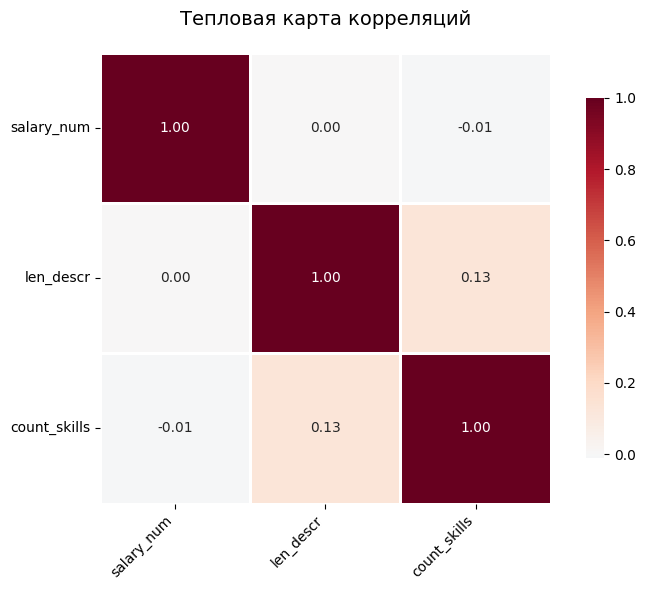

In [60]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,            # показывать значения в ячейках
    fmt='.2f',            # формат чисел (2 знака после запятой)
    cmap='RdBu_r',        # цветовая схема (красно-синяя)
    center=0,             # центр шкалы на 0
    square=True,          # квадратные ячейки
    linewidths=1,         # толщина линий между ячейками
    cbar_kws={'shrink': 0.8}  # размер цветовой шкалы
)

plt.title('Тепловая карта корреляций', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

18. Какие скиллы чаще всего требуются? Выведите топ-10 требуемых скиллов.

In [61]:
all_skills = {}
for skills in df['key_skills'].dropna():
    skills = eval(skills)
    for skill in skills:
        all_skills[skill] = all_skills.get(skill, 0) + 1

print('Топ-10 требуемых скиллов с их встречаемостью:')
for skill in sorted(all_skills.keys(), key=lambda x: -all_skills[x])[:10]:
    print(skill, all_skills[skill])

Топ-10 требуемых скиллов с их встречаемостью:
Python 633
SQL 574
ETL 154
Big Data 146
Hadoop 118
PostgreSQL 113
DWH 111
Clickhouse 102
Английский язык 93
Математический анализ 90


19. Постройте гистограмму распределения зарплаты среди вакансий в рублях.  

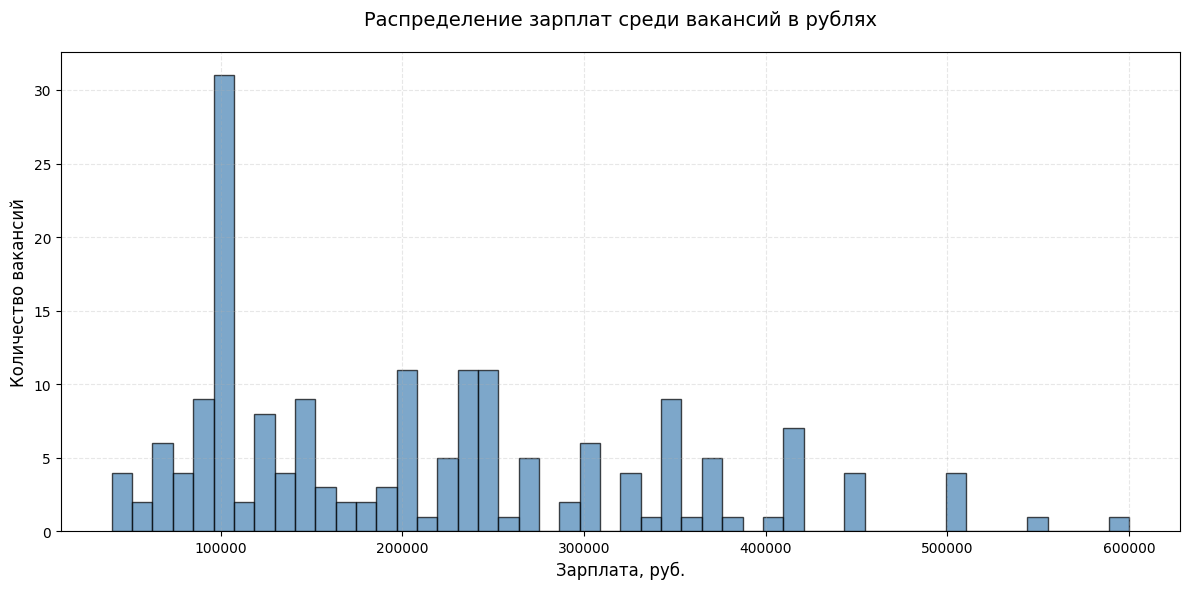

In [62]:
rub_salaries = df[(df['currency'] == 'RUR') & (df['salary_num'].notna())]['salary_num']

plt.figure(figsize=(12, 6))
plt.hist(rub_salaries, bins=50, edgecolor='black', alpha=0.7, color='steelblue')

plt.xlabel('Зарплата, руб.', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.title('Распределение зарплат среди вакансий в рублях', fontsize=14, pad=20)
plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

20. Постройте boxplot зарплаты (среди вакансий в рублях) с группировкой по полю experience

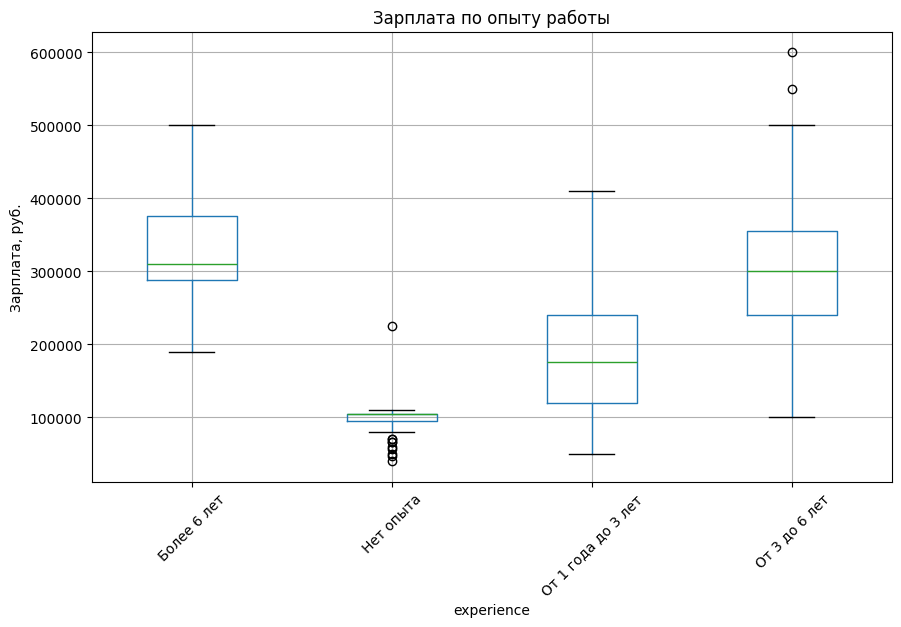

In [63]:
rub_df = df[(df['currency'] == 'RUR') & (df['salary_num'].notna())]

rub_df.boxplot(column='salary_num', by='experience', figsize=(10, 6))
plt.xticks(rotation=45)
plt.suptitle('')
plt.title('Зарплата по опыту работы')
plt.ylabel('Зарплата, руб.')
plt.show()